In [1]:
import sys
sys.path.insert(0, '..')
import qtm.qcompilation
import matplotlib.pyplot as plt
import qiskit
import qtm.qsp
import qtm.ansatz, qtm.state
%load_ext autoreload
%autoreload 2

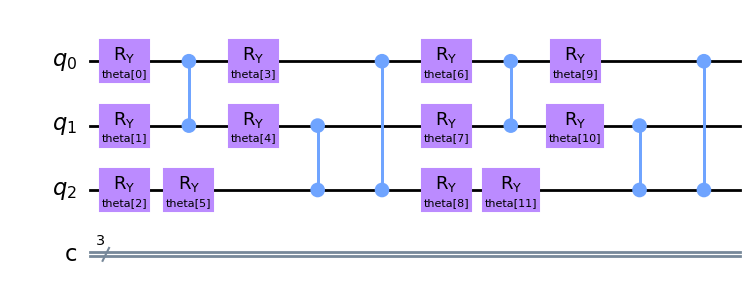

In [45]:
qtm.ansatz.g2(3, 2).draw('mpl')

In [4]:
def f(num_qubits, num_layers, anszat, vdagger_input):
    optimizer = 'adam'

    if anszat == 'g2':
        u_input = qtm.ansatz.g2(num_qubits, num_layers) 
        ansatz_input = qtm.ansatz.g2
    if anszat == 'g2gn':
        u_input = qtm.ansatz.g2gn(num_qubits, num_layers) 
        ansatz_input = qtm.ansatz.g2gn
    if anszat == 'g2gnw':
        u_input = qtm.ansatz.g2gnw(num_qubits, num_layers) 
        ansatz_input = qtm.ansatz.g2gnw
        
    if vdagger_input == 'ghz':
            vdagger = qtm.state.create_ghz_state(num_qubits).inverse()
    if vdagger_input == 'w':
            vdagger = qtm.state.create_w_state(num_qubits).inverse()
    if vdagger_input == 'ame':
            vdagger = qtm.state.create_ame_state(num_qubits).inverse()   
    if vdagger_input == 'haar':
            vdagger = qtm.state.create_haar_state(num_qubits).inverse() 
    compiler = qtm.qcompilation.QuantumCompilation(
        u = u_input,
        vdagger = vdagger,
        optimizer = optimizer,
        loss_func = 'loss_fubini_study'
    )
    compiler.fit(num_steps = 10, verbose = 1)
    qspobj = qtm.qsp.QuantumStatePreparation(
        compiler.u, 
        compiler.vdagger,
        compiler.thetas,
        ansatz = ansatz_input)
    qspobj.save(state = vdagger_input, file_name='./')

    return

In [5]:
f(3, 1, 'g2gn', 'ame')

Step: 100%|██████████| 10/10 [00:04<00:00,  2.12it/s]


In [8]:
from qtm.qsp import QuantumStatePreparation

qspobj2 = QuantumStatePreparation('./haar_g2gn_3_1.qspobj')
print(qspobj2.fidelity)

0.9999084096089257


In [6]:
 #Execution Program

list_num_qubits = [5,6]
list_num_layers = [1]
list_u = ['g2', 'g2gn', 'g2gnw']
list_v = ['ghz', 'W', 'haar']

import os

folder_path = '../experiments/qsp/'

for i in list_num_qubits:
    for j in list_num_layers:
        for k in list_u:
            for l in list_v:
                name = str(l) + '_' + str(k) + '_' + str(i) + '_' + str(j) + '.qspobj'
                 # Get a list of all files and directories in the folder
                all_items = os.listdir(folder_path)

                # Filter out only the file names
                file_names = [item for item in all_items if os.path.isfile(os.path.join(folder_path, item))]
                if not (name in file_names): 
                    print(name)
                    f(i,j,k,l)

l = 'AME'
for i in [3,4]:
    for j in list_num_layers:
        for k in list_u:
            f(i,j,k,l)

print("Done!")

ghz_g2_5_1.qspobj


Step: 100%|██████████| 10/10 [00:02<00:00,  3.89it/s]


W_g2_5_1.qspobj


Step: 100%|██████████| 10/10 [00:02<00:00,  3.44it/s]


haar_g2_5_1.qspobj


Step: 100%|██████████| 10/10 [00:27<00:00,  2.77s/it]


ghz_g2gn_5_1.qspobj


Step: 100%|██████████| 10/10 [00:04<00:00,  2.45it/s]


W_g2gn_5_1.qspobj


Step: 100%|██████████| 10/10 [00:04<00:00,  2.08it/s]


haar_g2gn_5_1.qspobj


Step: 100%|██████████| 10/10 [00:41<00:00,  4.15s/it]


ghz_g2gnw_5_1.qspobj


Step: 100%|██████████| 10/10 [00:08<00:00,  1.22it/s]


W_g2gnw_5_1.qspobj


Step: 100%|██████████| 10/10 [00:09<00:00,  1.06it/s]


haar_g2gnw_5_1.qspobj


Step: 100%|██████████| 10/10 [01:22<00:00,  8.25s/it]


ghz_g2_6_1.qspobj


Step: 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


W_g2_6_1.qspobj


Step: 100%|██████████| 10/10 [00:04<00:00,  2.46it/s]


haar_g2_6_1.qspobj


Step: 100%|██████████| 10/10 [01:22<00:00,  8.29s/it]


ghz_g2gn_6_1.qspobj


Step: 100%|██████████| 10/10 [00:05<00:00,  1.87it/s]


W_g2gn_6_1.qspobj


Step: 100%|██████████| 10/10 [00:06<00:00,  1.57it/s]


haar_g2gn_6_1.qspobj


Step: 100%|██████████| 10/10 [02:02<00:00, 12.28s/it]


ghz_g2gnw_6_1.qspobj


Step: 100%|██████████| 10/10 [00:11<00:00,  1.12s/it]


W_g2gnw_6_1.qspobj


Step: 100%|██████████| 10/10 [00:12<00:00,  1.28s/it]


haar_g2gnw_6_1.qspobj


Step: 100%|██████████| 10/10 [00:27<00:00,  2.74s/it]


Done!
